## Project Type

EDA (Explanatory Data Analysis), used to give best insight about the dataset and building a machine learning.


## Project Goal

Project Objective: Build a machine learning model to predict the likelihood of a patient having heart disease based on their medical record attributes. This model is expected to assist medical personnel in conducting initial examinations.

## Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Cleansing

In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
median_chol = df.groupby(['Sex', 'HeartDisease'])['Cholesterol'].transform('median')
df['Cholesterol'].fillna(median_chol, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20388\161889527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(median_chol, inplace=True)


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,244.341503,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.475972,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,243.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,269.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Visualization

<Axes: xlabel='HeartDisease', ylabel='count'>

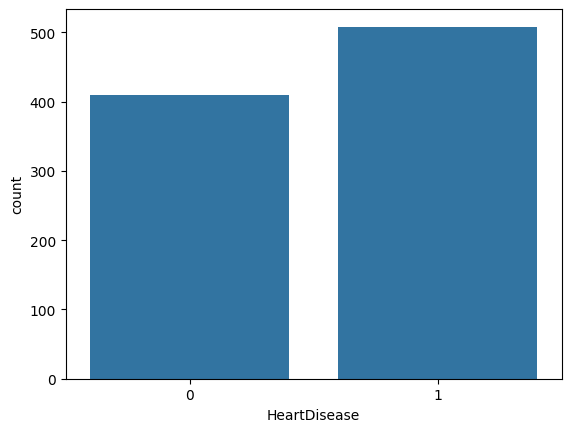

In [8]:
sns.countplot(x='HeartDisease', data=df)

400-ish population don't have heart disease

500-ish population having heart disease

<Axes: xlabel='Age', ylabel='Count'>

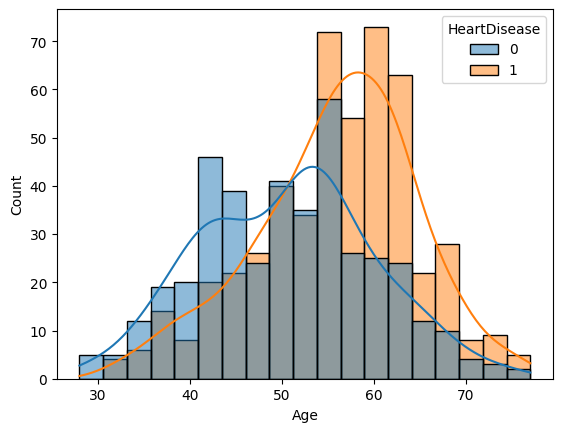

In [9]:
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

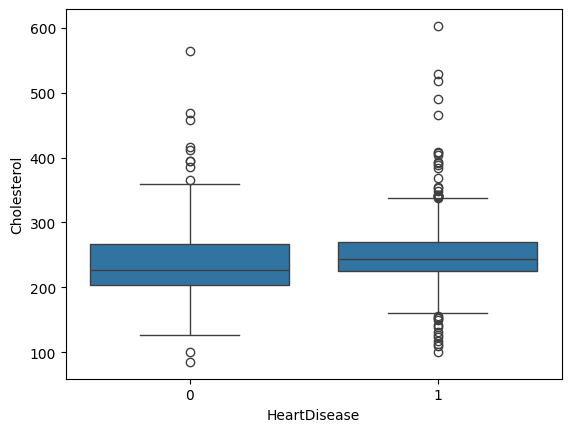

In [10]:
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol')

<Axes: xlabel='Sex', ylabel='count'>

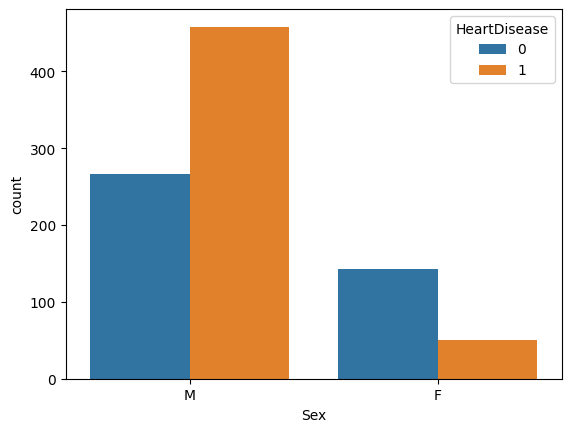

In [11]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')

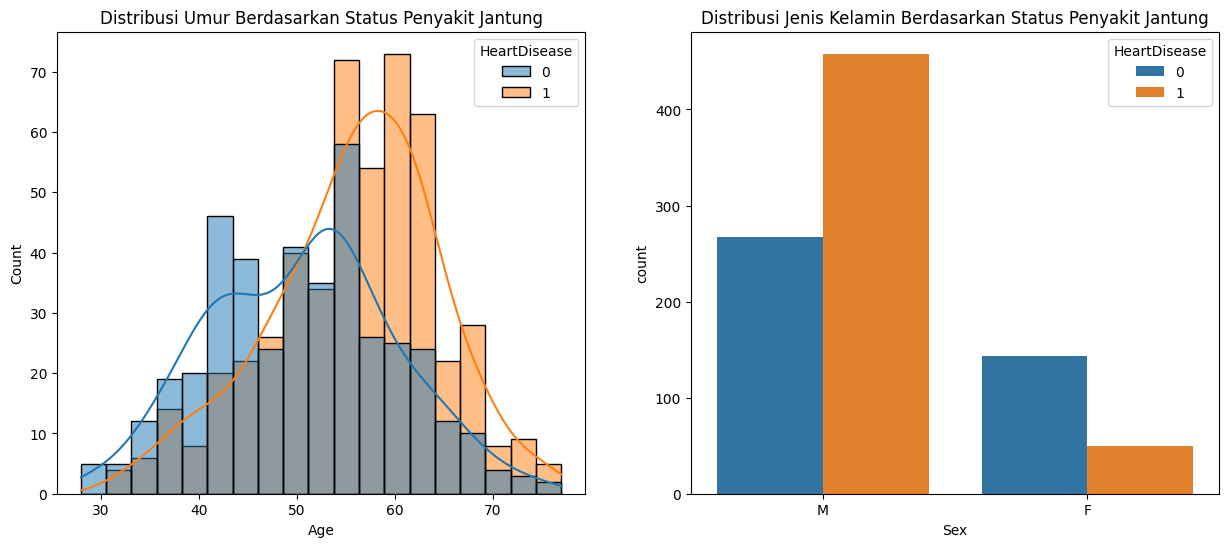

In [12]:
# Contoh membuat 2 plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(ax=axes[0], data=df, x='Age', hue='HeartDisease', kde=True)
axes[0].set_title('Distribusi Umur Berdasarkan Status Penyakit Jantung')

sns.countplot(ax=axes[1], data=df, x='Sex', hue='HeartDisease')
axes[1].set_title('Distribusi Jenis Kelamin Berdasarkan Status Penyakit Jantung')

plt.show()

In [13]:
# Contoh (ini hanya hipotesis, bukan saran medis)
df['BPRatio'] = df['RestingBP'] / df['MaxHR']

# Membuat kategori umur
bins = [20, 40, 60, 80]
labels = ['Muda', 'Paruh Baya', 'Lansia']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Jangan lupa melakukan one-hot encoding pada AgeGroup ini nanti



## Feature Engineering & Preprocessing 

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [15]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

# Setelah train_test_split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184


Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## Hyperparameter Tuning


In [20]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin diuji untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                         param_grid=param_grid, 
                         cv=5, # 5-fold cross-validation
                         verbose=2, 
                         n_jobs=-1) # Gunakan semua core CPU

# Latih pada data yang sudah di-scale
grid_search.fit(X_train_scaled, y_train)

print(f"Parameter terbaik: {grid_search.best_params_}")
# Gunakan model terbaik ini untuk prediksi
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Parameter terbaik: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


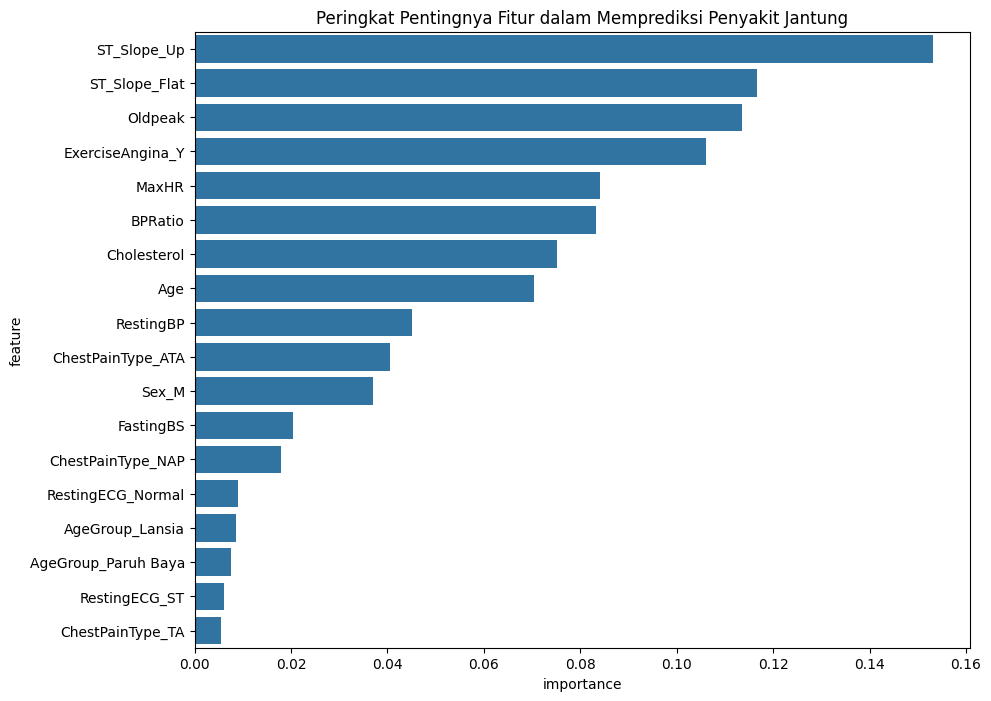

In [21]:
# Gunakan best_rf_model dari GridSearchCV
importances = best_rf_model.feature_importances_
feature_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Peringkat Pentingnya Fitur dalam Memprediksi Penyakit Jantung')
plt.show()

## Advanced Model Interpretation with SHAP

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP Summary Plot (Global Feature Importance)


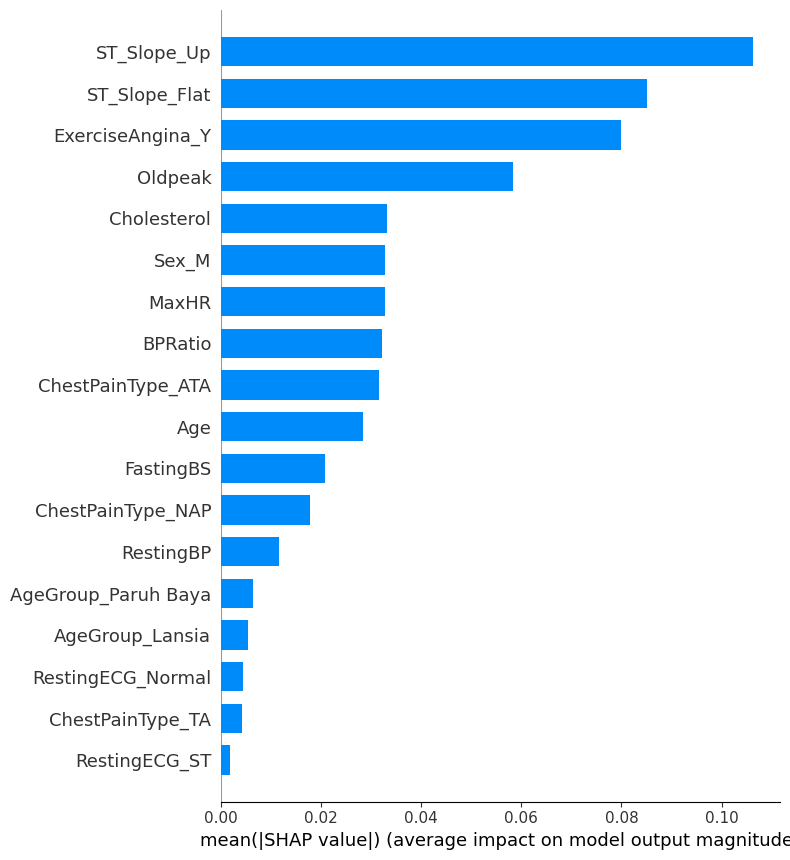


SHAP Feature Impact Plot


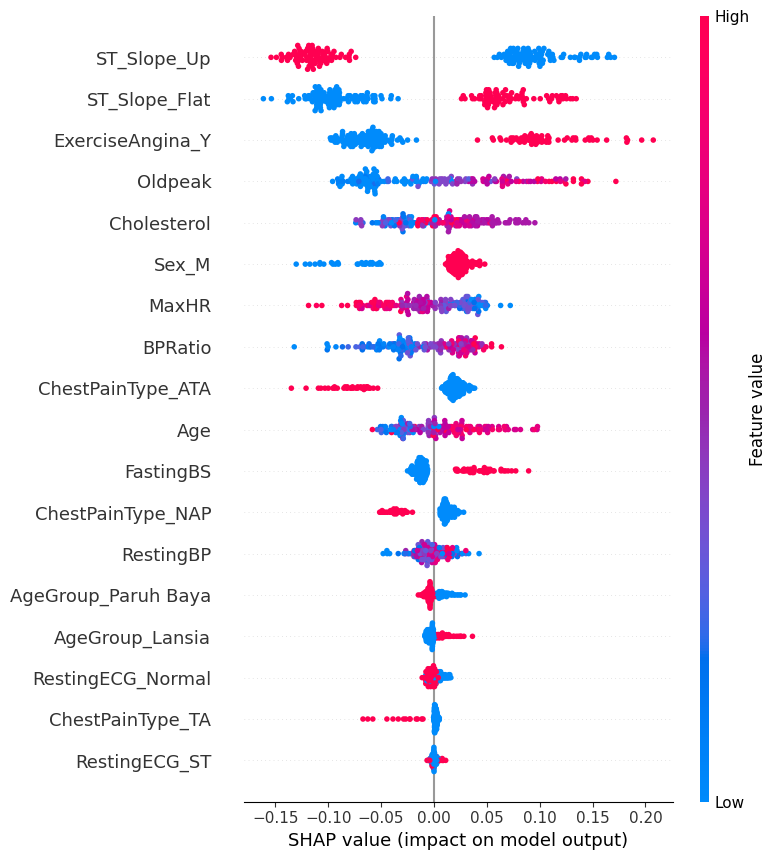

In [22]:
import shap

# Gunakan model terbaik Anda yang sudah dilatih (best_rf_model)
# dan data uji yang sudah di-scale (X_test_scaled)

# 1. Buat SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)

# 2. Hitung SHAP values untuk data uji Anda
shap_values = explainer.shap_values(X_test_scaled)

# 3. Buat Summary Plot untuk melihat feature importance secara global
print("SHAP Summary Plot (Global Feature Importance)")
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# Untuk binary classification, gunakan shap_values[..., 1] jika shap_values adalah array 3D
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
	shap.summary_plot(shap_values[..., 1], X_test_scaled_df, plot_type="bar")
elif isinstance(shap_values, list) and len(shap_values) == 2:
	shap.summary_plot(shap_values[1], X_test_scaled_df, plot_type="bar")
else:
	shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

# 4. Buat Summary Plot lain untuk melihat dampak fitur
print("\nSHAP Feature Impact Plot")
# shap_values[..., 1] atau shap_values[1] karena kita tertarik pada prediksi kelas '1' (Sakit Jantung)
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
	shap.summary_plot(shap_values[..., 1], X_test_scaled_df)
elif isinstance(shap_values, list) and len(shap_values) == 2:
	shap.summary_plot(shap_values[1], X_test_scaled_df)
else:
	shap.summary_plot(shap_values, X_test_scaled_df)

## Deployment


In [ ]:
import pickle
import shap
from sklearn.ensemble import RandomForestClassifier # Pastikan semua library ada

# Asumsi: 'best_rf_model' adalah model terbaik Anda yang sudah dilatih
# Asumsi: 'scaler' adalah scaler Anda yang sudah di-fit

# --- Simpan model dan scaler (seperti sebelumnya) ---
with open('heart_failure_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)
with open('heart_failure_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# --- PERSIAPAN BARU: Buat dan simpan SHAP explainer ---
# SHAP membutuhkan data latih untuk memberikan konteks
# Asumsi: X_train_scaled adalah data latih Anda yang sudah di-scale
explainer = shap.TreeExplainer(best_rf_model)

with open('shap_explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)

print("Model, Scaler, dan SHAP Explainer berhasil disimpan!")

Model dan Scaler berhasil disimpan!


In [27]:
import pickle
import shap

# Pastikan variabel 'best_model' dan 'X_train_scaled' sudah ada dari sel-sel sebelumnya
# 'best_model' adalah model terbaik Anda dari GridSearchCV
# 'X_train_scaled' adalah data latih Anda yang sudah di-scale

# 1. Buat SHAP explainer menggunakan model terbaik dan data latih
explainer = shap.TreeExplainer(best_rf_model, X_train_scaled)

# 2. Simpan objek explainer ini ke dalam file
with open('shap_explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)

print("File 'shap_explainer.pkl' berhasil dibuat dan disimpan di folder Anda!")

File 'shap_explainer.pkl' berhasil dibuat dan disimpan di folder Anda!
